# Итоговый проект.

Анализ личности клиента — это подробный анализ клиентов компании. Он помогает компании лучше понять своих клиентов и облегчает изменение продукции в соответствии со специфическими потребностями, поведением различных типов клиентов.

Анализ личности клиента помогает компании модифицировать свой продукт в соответствии с целевыми потребителями из различных сегментов потребителей. Например, вместо того, чтобы тратить деньги на маркетинг нового продукта для каждого клиента в базе данных компании, компания может проанализировать, какой сегмент клиентов с наибольшей вероятностью купит продукт, и затем продвигать продукт только для этого сегмента.

Описание столбцов:

|Название| Описание |
|--|--|
|ID| Уникальный идентификатор клиента|
|Year_Birth| Год рождения клиента|
|Education | Уровень образования клиента|
|Marital_Status| Семейное положение клиента|
|Income| Годовой доход семьи клиента|
|Kidhome| Количество детей в семье клиента|
|Teenhome| Количество подростков в домохозяйстве клиента|
|Dt_Customer| Дата регистрации клиента в компании|
|Recency| Количество дней с момента последней покупки клиента|
|Complain| 1, если клиент жаловался в течение последних 2 лет, 0 —  в противном случае|
|MntWines|  Сумма, потраченная на вино за последние 2 года|
|MntFruits| Сумма, потраченная на фрукты за последние 2 года|
|MntMeatProducts| Сумма, потраченная на мясо за последние 2 года|
|MntFishProducts| Сумма, потраченная на рыбу за последние 2 года|
|MntSweetProducts| Сумма, потраченная на сладости за последние 2 года|
|MntGoldProds| Сумма, потраченная на золото за последние 2 года|
|NumDealsPurchases| Количество покупок, совершенных со скидкой|
|AcceptedCmp1| 1, если клиент принял предложение в 1-й кампании, 0 — иначе|
|AcceptedCmp2| 1, если клиент принял предложение во 2-й компании, 0 — иначе|
|AcceptedCmp3| 1, если клиент принял предложение в 3-й кампании, 0 — иначе|
|AcceptedCmp4| 1, если клиент принял предложение в 4-й кампании, 0 — иначе|
|AcceptedCmp5| 1, если клиент принял предложение в 5-й кампании, 0 — иначе|
|Response| 1, если клиент принял предложение в последней кампании, 0 — иначе|
|NumWebPurchases| Количество покупок, совершенных через веб-сайт компании|
|NumCatalogPurchases| Количество покупок, сделанных с помощью каталога|
|NumStorePurchases| Количество покупок, сделанных непосредственно в магазинах|
|NumWebVisitsMonth| Количество посещений веб-сайта компании за последний месяц|

## Задание

Проведите полный цикл анализа данных (EDA), что проходили ранее. Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных. Очистить данные и удалить/заполнить пропуски.
2. Описательный анализ данных, просмотр данных и вывод статистик
3. Постройте необходимые графики для анализа
4. Проверьте гипотезы
5. Сделайте отчет-вывод по исследованию

Что хочет узнать заказчик?

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

**ЗАДАНИЕ ПРО**

1. Разбейте данные на несколько выборок: по образованию, по уровню заработка и по семейному статусу. Опишите все эти выборки и скажите — отличаются ли они между собой? Опишите общие закономерности для каждого типа — на что чаще тратит женатый человек и жалуется ли он? Люди с PhD покупают фрукты? И тд
2. Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0— меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?
3. Проведите дополнительный анализ, который поможет дать больше информации для заказчика.

## Загрузка данных

In [173]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik import resources
from phik.report import plot_correlation_matrix
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1659,2781,1981,Graduation,Single,72066.0,0,0,23-06-2014,55,1003,...,2,0,0,1,1,0,0,3,11,1
999,9097,1956,Graduation,Divorced,46086.0,0,1,03-11-2013,34,244,...,4,0,0,0,0,0,0,3,11,0
1773,8584,1952,PhD,Together,85431.0,0,0,08-06-2013,54,376,...,0,0,0,0,0,0,0,3,11,0
756,4012,1972,PhD,Together,62220.0,0,1,11-08-2012,55,799,...,6,0,0,0,0,0,0,3,11,1
1332,1945,1962,Graduation,Married,71434.0,0,1,18-09-2013,4,711,...,4,0,1,0,1,0,0,3,11,0


In [21]:
df.shape

(2240, 29)

In [22]:
display(df[df.columns[:10]].sample(5))
display(df[df.columns[10:20]].sample(5))
display(df[df.columns[20:]].sample(5))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines
414,3523,1962,Graduation,Together,75072.0,0,1,23-01-2013,83,583
179,6935,1951,2n Cycle,Married,78497.0,0,0,01-12-2013,44,207
2200,7620,1990,Basic,Single,16185.0,1,0,05-08-2013,71,5
1987,4552,1991,Graduation,Married,51373.0,0,0,22-06-2013,37,83
1742,263,1945,PhD,Single,45576.0,0,0,28-05-2014,9,56


,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
1324,10,13,16,0,4,2,3,0,3,8
963,4,46,0,17,2,5,2,1,5,6
731,4,78,6,0,43,8,7,2,6,8
1394,0,6,0,0,0,2,2,0,3,5
1957,41,86,45,6,27,5,5,3,5,7


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1345,0,0,0,0,0,0,3,11,0
934,0,0,0,0,0,0,3,11,0
275,0,0,0,0,0,0,3,11,0
357,0,0,0,0,0,0,3,11,0
1003,0,0,0,0,0,0,3,11,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- Нули обнаружены только в столбце `Income`
- Можно поменять тип данных столбца `Dt_Customer` на дату

## Описательный анализ данных

Рассмотрите данные — изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [25]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


**Вывод:**
- В среднем `Year_Birth` - 1970
- Средний годовой доход семьи - 51500
- У большинства нет детей 
- У большинства нет подростков
- В среднем прошло 49 дней с момента покупки клиента
- Средняя сумма, потраченная на вино за последние два года - 304, медианная - 173. Максимальная сумма - 1493. Значит есть группа людей, которая тратит на вино очень много
- Средняя сумма, потраченная на фрукты за последние два года - 26, медианная - 8. Максимальная сумма - 199. Значит есть группа людей, которая тратит на фрукты очень много
- Средняя сумма, потраченная на мясо за последние два года - 167, медианная - 67. Максимальная сумма - 1725. Значит есть группа людей, которая тратит на мясо очень много
- Средняя сумма, потраченная на рыбу за последние два года - 37, медианная - 12. Максимальная сумма - 259. Значит есть группа людей, которая тратит на рыбу очень много
- Средняя сумма, потраченная на сладости за последние два года - 27, медианная - 8. Максимальная сумма - 263. Значит есть группа людей, которая тратит на сладости очень много
- Средняя сумма, потраченная на золотую продукцию за последние два года - 44, медианная - 24. Максимальная сумма - 362. Значит есть группа людей, которая тратит на золото много
- Количество продуктов, купленных со скидкой у людей в среднем - 2
- Среднее количество покупок, сделанных через сайт - 4. Максмум 27
- Среднее количество покупок, сделанных с помощью каталога - 2. Максмум 28
- Среднее количество покупок, сделанных непосредственно в магазине - 5
- Среднее количество посещений сайта - 6
- Клиенты почти не жаловались за 2 года

## Предобработка данных

### Дубликаты

Предобработайте датасет — проверьте на наличие дубликатов и удалите, если они есть.

In [35]:
df.duplicated().sum()

np.int64(0)

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [36]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [43]:
for col in df:
    if df[col].dtype == 'object':
        nans1 = df[col].apply(lambda x: len(x.strip())==0).sum()
        nans2 = df[col].apply(lambda x: x == '-').sum()
        if nans1 > 0 or nans2 > 0:
            print(f'Неявные пропуски столбца `{col}`:', df[col].apply(lambda x: len(x.strip())==0).sum())
        else:
            print(f'Неявных пропусков у столбца `{col}` нет')

Неявных пропусков у столбца `Education` нет
Неявных пропусков у столбца `Marital_Status` нет
Неявных пропусков у столбца `Dt_Customer` нет


In [44]:
for col in df:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        nans = df[col].apply(lambda x: x == 0).sum()
        if nans > 0:
            print(f'Есть нули в столбце {col}')
        else:
            print(f'Неявных пропусков у столбца `{col}` нет')

Есть нули в столбце ID
Неявных пропусков у столбца `Year_Birth` нет
Неявных пропусков у столбца `Income` нет
Есть нули в столбце Kidhome
Есть нули в столбце Teenhome
Есть нули в столбце Recency
Есть нули в столбце MntWines
Есть нули в столбце MntFruits
Есть нули в столбце MntMeatProducts
Есть нули в столбце MntFishProducts
Есть нули в столбце MntSweetProducts
Есть нули в столбце MntGoldProds
Есть нули в столбце NumDealsPurchases
Есть нули в столбце NumWebPurchases
Есть нули в столбце NumCatalogPurchases
Есть нули в столбце NumStorePurchases
Есть нули в столбце NumWebVisitsMonth
Есть нули в столбце AcceptedCmp3
Есть нули в столбце AcceptedCmp4
Есть нули в столбце AcceptedCmp5
Есть нули в столбце AcceptedCmp1
Есть нули в столбце AcceptedCmp2
Есть нули в столбце Complain
Неявных пропусков у столбца `Z_CostContact` нет
Неявных пропусков у столбца `Z_Revenue` нет
Есть нули в столбце Response


Удаляем значения nan из значения `Income`<br>
Заменим nan на средний годовой доход клиента

In [49]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [50]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [51]:
df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [52]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [59]:
df['Income'] = df['Income'].astype(int)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

**Вывод:**
- Нет дубликатов
- NaN-значения `Income` были заменены на средние
- Был изменен тип данных столбца Dt_Customer на datetime

## Визуализация

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [71]:
df['Complain'].sample(10)

399     0
2236    0
847     0
2112    0
454     0
1071    0
1150    0
1705    0
1777    0
209     0
Name: Complain, dtype: int64

In [88]:
col_continuous_data = ['Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', ]
col_discrete_data = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']

indexes = [
    [0, 0], [0, 1],
    [1, 0], [1, 1],
    [2, 0], [2, 1],
    [3, 0], [3, 1],
    [4, 0], [4, 1],
]

In [73]:
len(col_continuous_data)

10

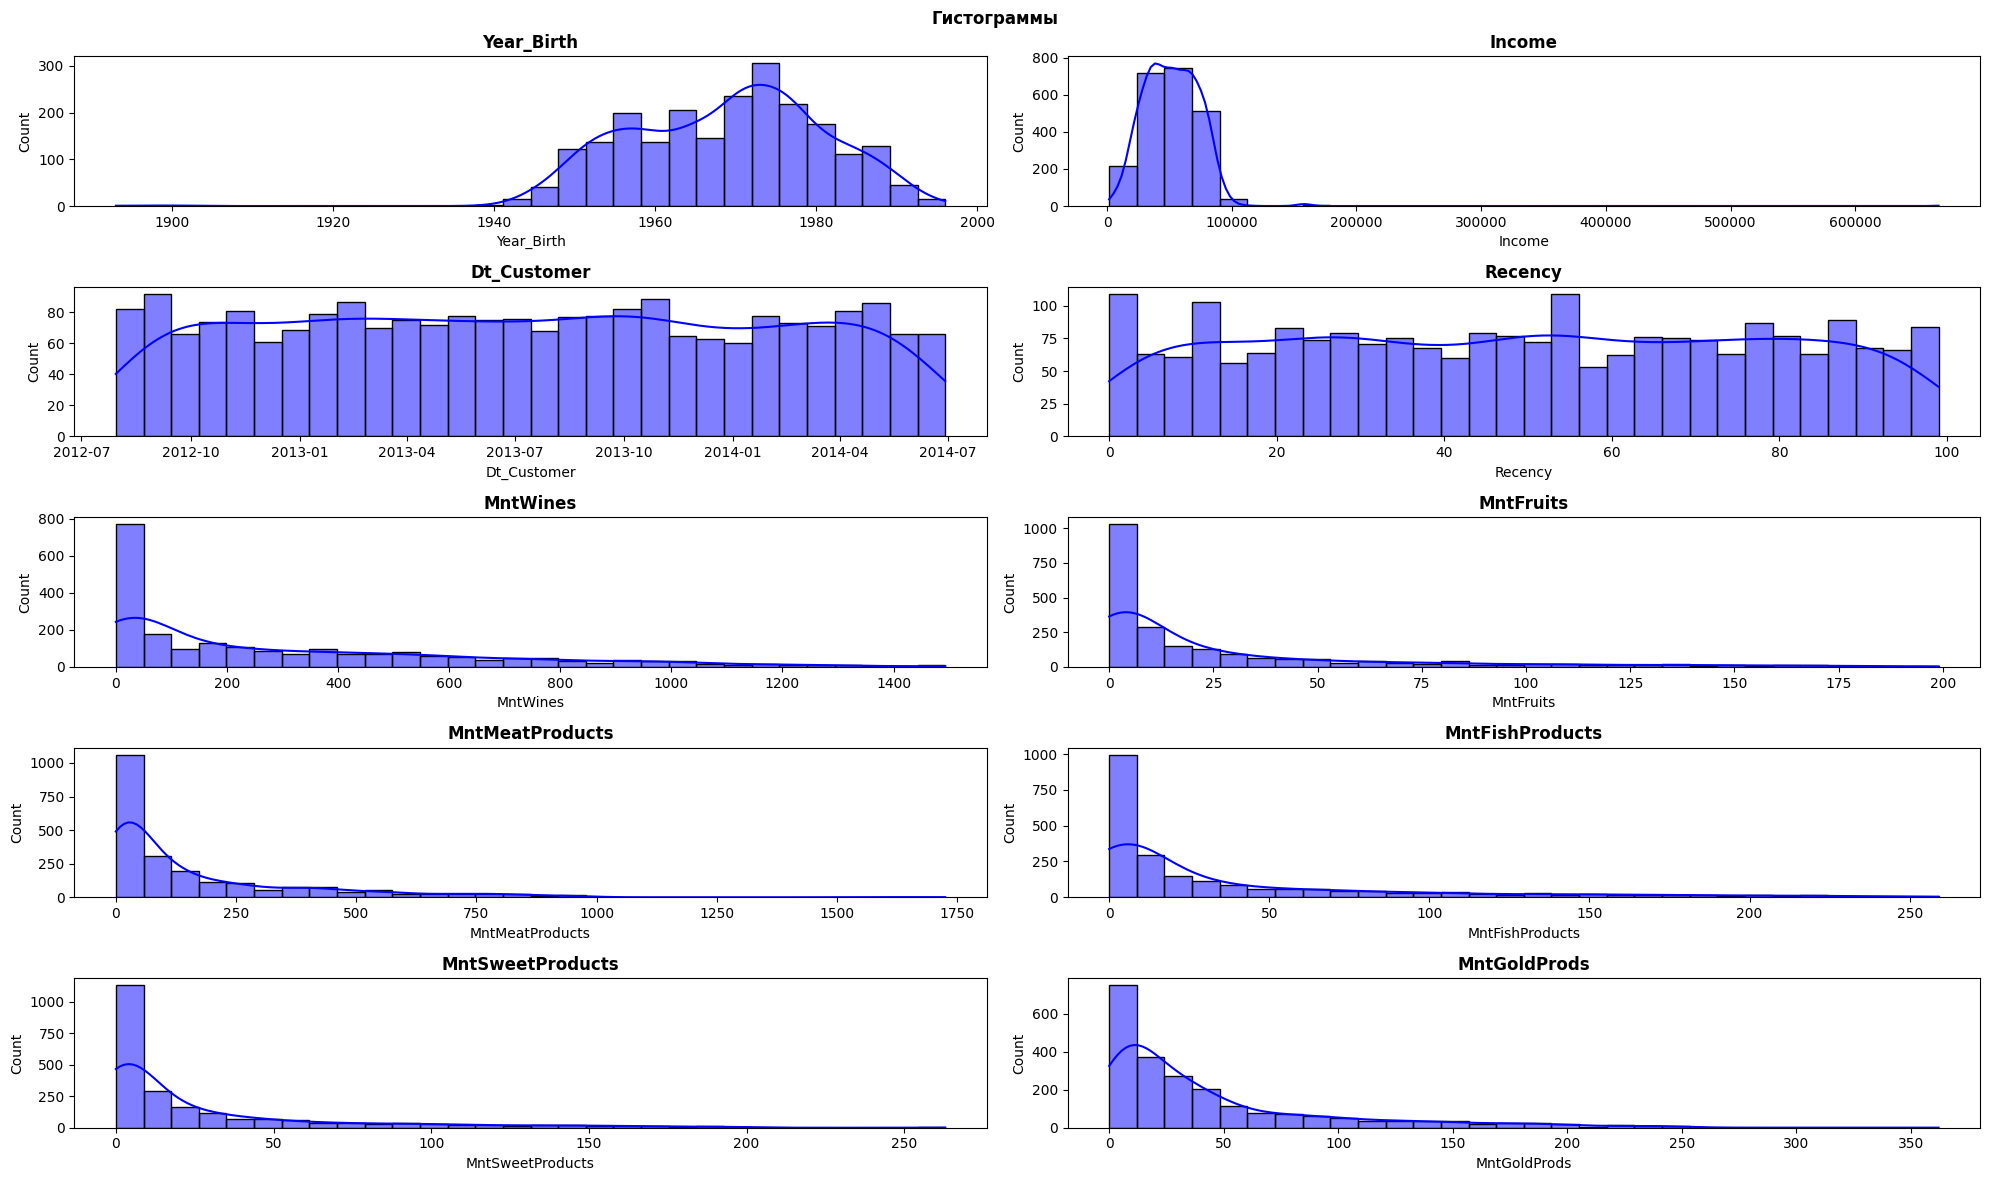

In [78]:
fig, ax = plt.subplots(5, 2, figsize=(20, 12))
fig.suptitle('Гистограммы', weight='bold')

for index, col in zip(indexes, col_continuous_data):
    x, y = index
    sns.histplot(df[col], bins=30, kde=True, ax=ax[x, y], color='blue')
    ax[x, y].set_title(col, weight='bold')
    ax[x, y].set_xlabel(col)

plt.tight_layout()
plt.show()

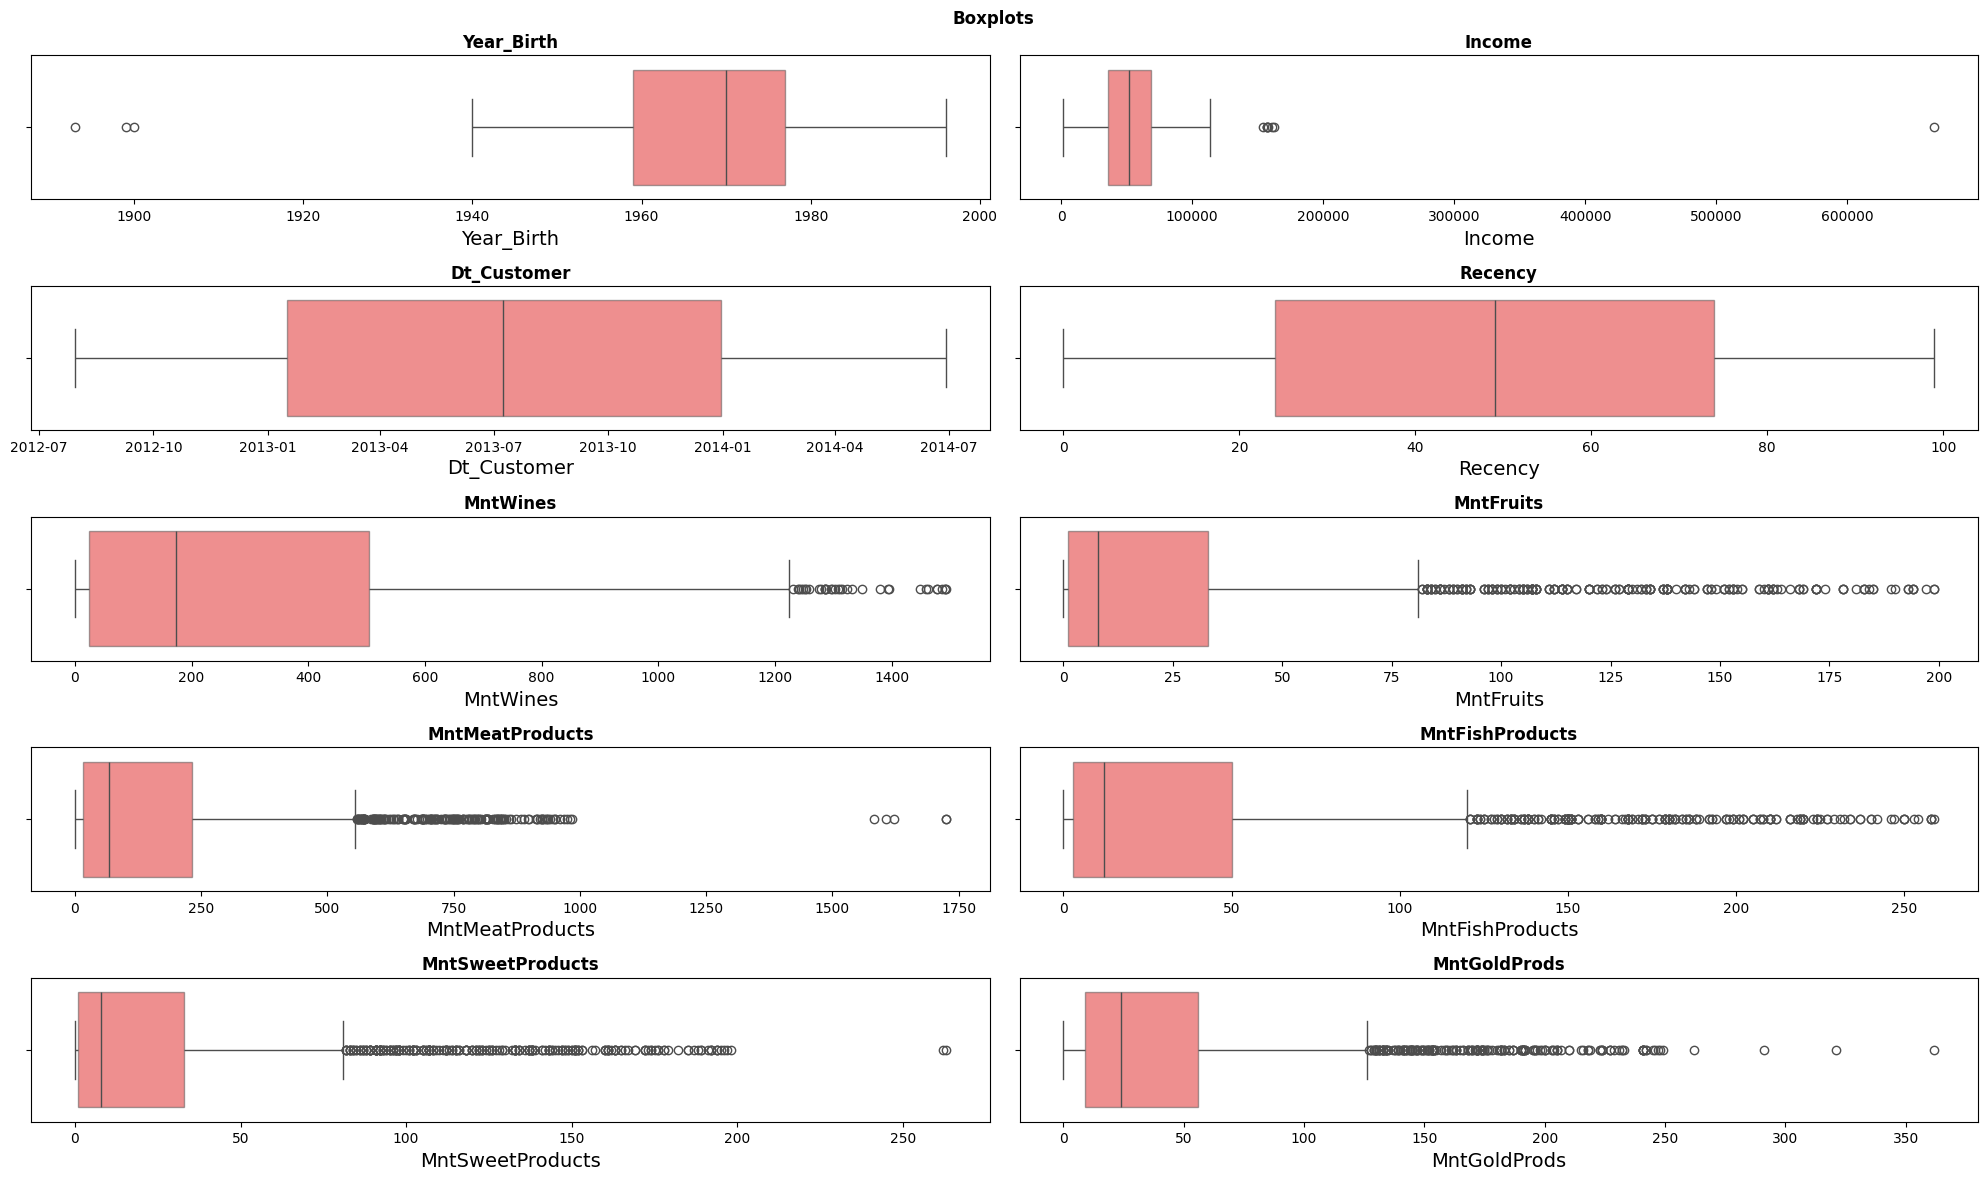

In [84]:
fig, ax = plt.subplots(5, 2, figsize=(20, 12))
fig.suptitle('Boxplots', weight='bold')

for index, col in zip(indexes, col_continuous_data):
    x, y = index
    sns.boxplot(df[col], orient='h', ax=ax[x, y], color='red', boxprops=dict(alpha=.5))
    ax[x, y].set_title(col, weight='bold',)
    ax[x, y].set_xlabel(col, fontsize=14)

plt.tight_layout()
plt.show()

In [85]:
len(col_discrete_data)

16

In [92]:
indexes = [
    [0, 0], [0, 1],
    [1, 0], [1, 1],
    [2, 0], [2, 1],
    [3, 0], [3, 1],
    [4, 0], [4, 1],
    [5, 0], [5, 1],
    [6, 0], [6, 1],
    [7, 0], [7, 1],
]

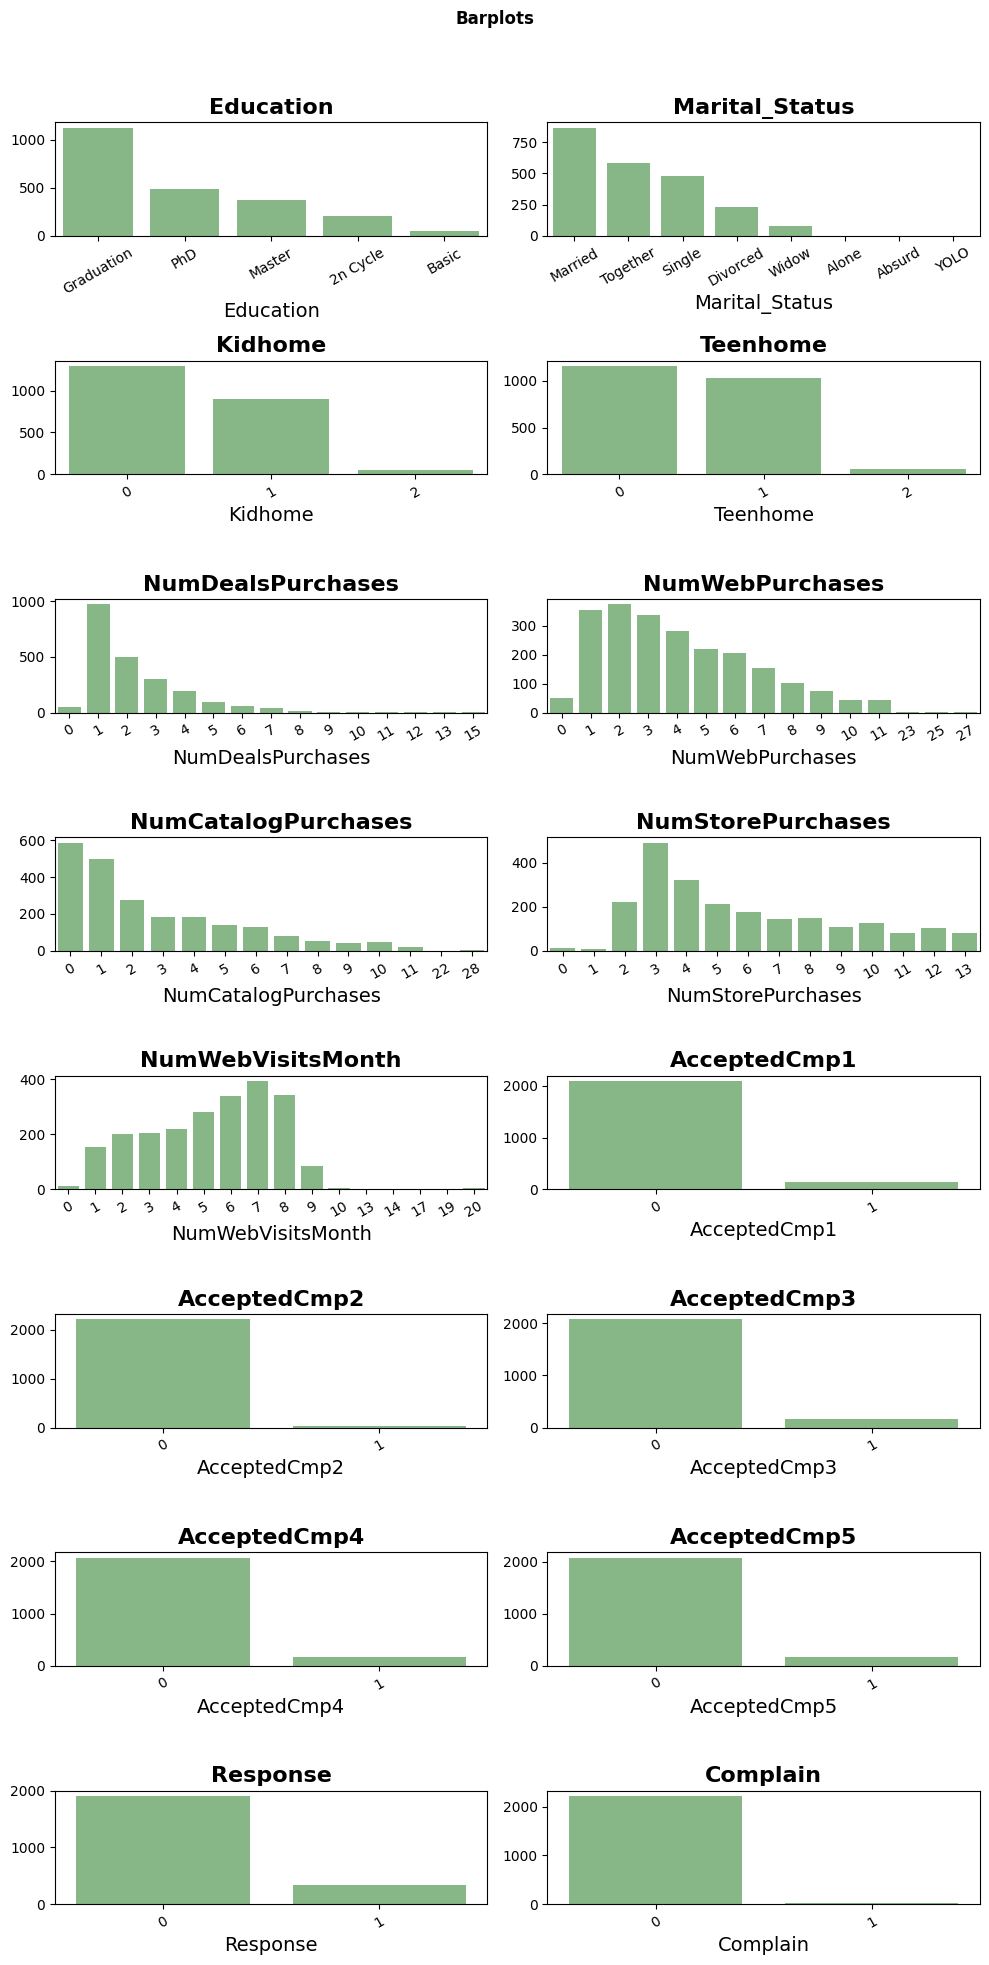

In [97]:
fig, ax = plt.subplots(8, 2, figsize=(10, 20))
fig.suptitle("Barplots", weight='bold')
for index, col in zip(indexes, col_discrete_data):
    x, y = index
    tmp = df[col].value_counts()

    sns.barplot(x=tmp.index, y=tmp.values, ax=ax[x, y], color='green', alpha=.5)
    ax[x, y].set_title(col, weight='bold', fontsize=16)
    ax[x, y].set_xlabel(col, fontsize=14)
    ax[x, y].set_ylabel('')
    ax[x, y].tick_params(axis='x', rotation=30)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Вывод:**
- Видны выбросы в столбцах `Year_Birth`, `Income`. Удалим их

In [98]:
df.loc[df['Year_Birth'] < 1930]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,3,11,0


In [102]:
df = df.drop(df.loc[df['Year_Birth'] < 1930].index)

In [103]:
df = df.reset_index(drop=True)

In [105]:
df.loc[df['Income'] > 300000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2230,9432,1977,Graduation,Together,666666,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0


In [106]:
df = df.drop(2230).reset_index(drop=True)

## Задание от заказчика

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2236 non-null   int64         
 1   Year_Birth           2236 non-null   int64         
 2   Education            2236 non-null   object        
 3   Marital_Status       2236 non-null   object        
 4   Income               2236 non-null   int64         
 5   Kidhome              2236 non-null   int64         
 6   Teenhome             2236 non-null   int64         
 7   Dt_Customer          2236 non-null   datetime64[ns]
 8   Recency              2236 non-null   int64         
 9   MntWines             2236 non-null   int64         
 10  MntFruits            2236 non-null   int64         
 11  MntMeatProducts      2236 non-null   int64         
 12  MntFishProducts      2236 non-null   int64         
 13  MntSweetProducts     2236 non-nul

In [112]:
cols_mnt = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [113]:
for col in cols_mnt:
    print(f'В среднем клиенты на {col} тратят {df[col].median()}')

В среднем клиенты на MntFruits тратят 8.0
В среднем клиенты на MntMeatProducts тратят 67.0
В среднем клиенты на MntFishProducts тратят 12.0
В среднем клиенты на MntSweetProducts тратят 8.0
В среднем клиенты на MntGoldProds тратят 24.0


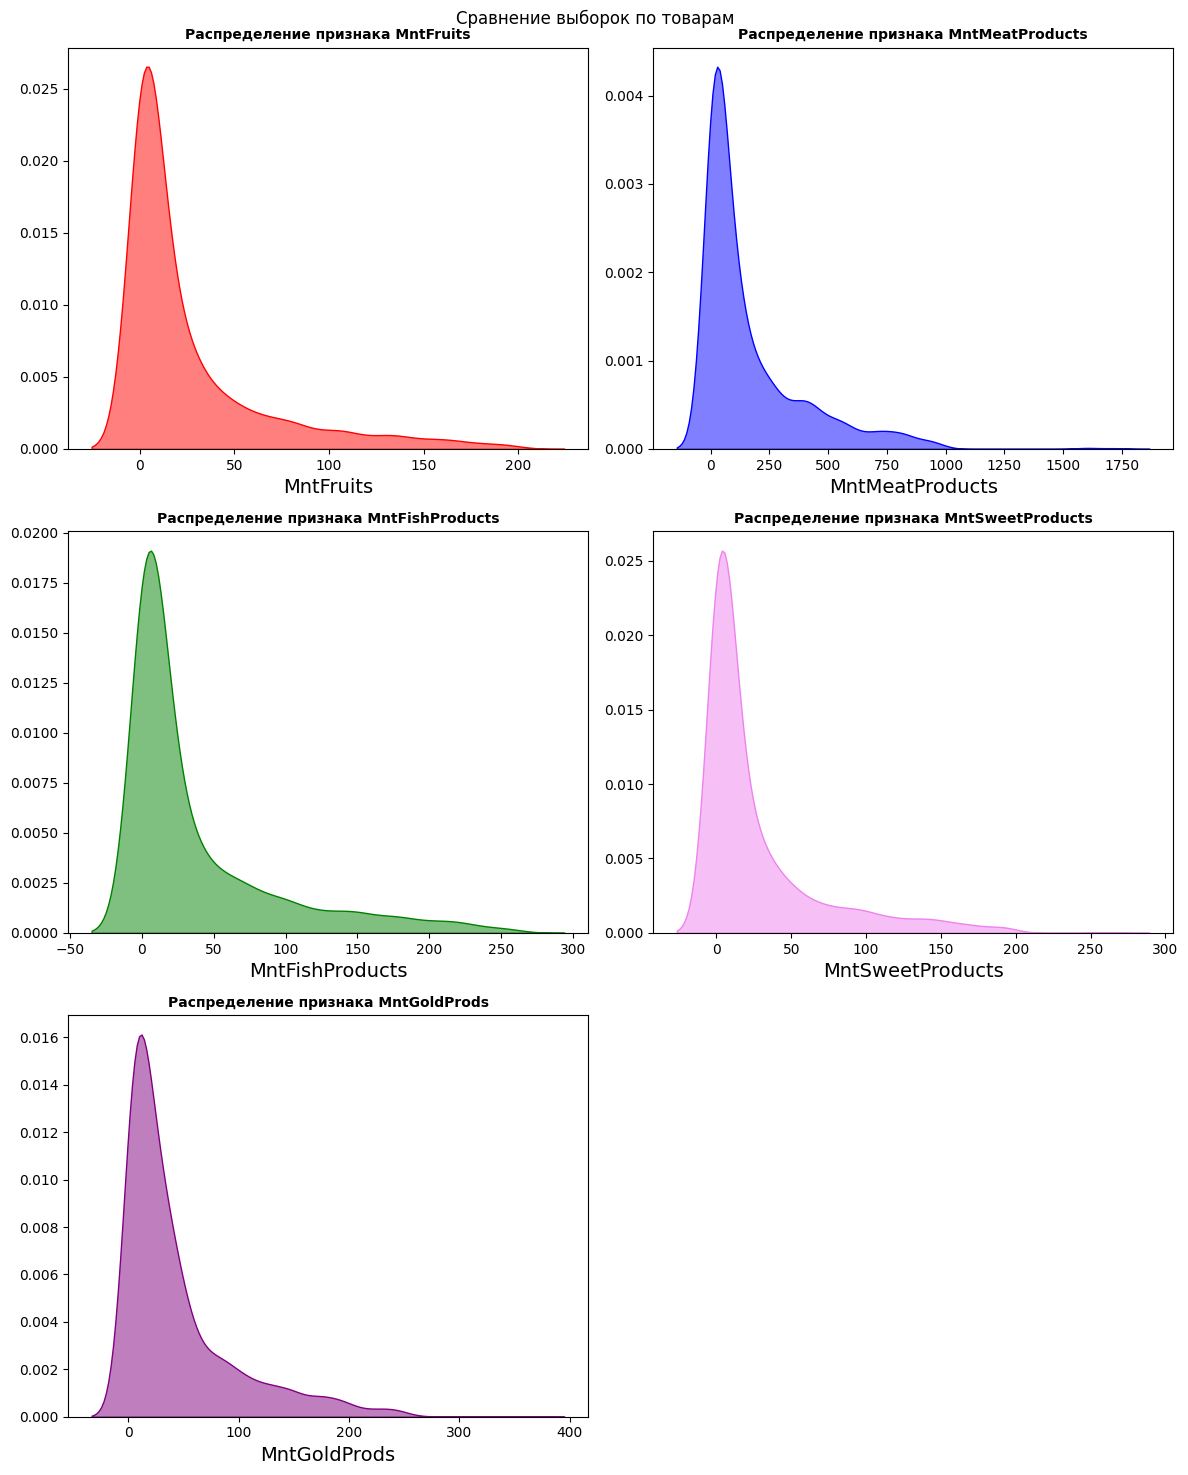

In [116]:
indexes = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0]]
colors = ['red', 'blue', 'green', 'violet', 'purple']
fig, ax = plt.subplots(3, 2, figsize=(12, 15))
fig.suptitle('Сравнение выборок по товарам')

for index, col, color in zip(indexes, cols_mnt, colors):
    x, y = index

    sns.kdeplot(df[col], ax=ax[x, y], color=color, alpha=0.5, fill=True)
    ax[x, y].set_title(f'Распределение признака {col}', weight='bold', fontsize=10)
    ax[x, y].set_xlabel(col, fontsize=14)
    ax[x, y].set_ylabel('')


fig.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

**Вывод**
- В среднем клиенты на MntFruits тратят 8.0
- В среднем клиенты на MntMeatProducts тратят 67.0
- В среднем клиенты на MntFishProducts тратят 12.0
- В среднем клиенты на MntSweetProducts тратят 8.0
- В среднем клиенты на MntGoldProds тратят 24.0
<br><br>
Высокие расходы могут указывать на дальнейший рост продаж, поэтому можно сделать упор на мясную продукцию

In [121]:
print(f'Средний возраст покупателя - {(2024 - df["Year_Birth"]).mean()}')

Средний возраст покупателя - 55.10196779964222


In [124]:
for col in cols_mnt:    
    print(f"{df['Year_Birth'].corr(df[col])}")

-0.013656733094031344
-0.03072857002907315
-0.04235926321880399
-0.019379190705617597
-0.057419476996675906


**Вывод**
<br>
Возраст не зависит от покупок

In [126]:
# Тратят ли больше, если много детей или иждивенцев
df_child = df.loc[(df['Kidhome'] > 1) | (df['Teenhome'] > 1) | (df['Kidhome'] + df['Teenhome'] > 1)]
df_child.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1211,3439,1972,Graduation,Married,56721,1,1,2012-10-31,64,157,...,6,0,0,0,0,0,0,3,11,0
397,2488,1956,2n Cycle,Divorced,31395,1,1,2013-03-23,80,23,...,6,0,0,0,0,0,0,3,11,0
1819,8334,1971,Master,Single,33316,1,1,2013-10-04,34,79,...,6,0,0,0,0,0,0,3,11,0
2015,255,1951,Graduation,Divorced,22263,1,1,2014-03-30,31,17,...,6,0,0,0,0,0,1,3,11,0
2147,6950,1958,Master,Married,49572,1,1,2013-12-15,25,35,...,7,0,0,0,0,0,0,3,11,0


In [129]:
df_not_child = df.loc[(df['Kidhome'] <= 1) & (df['Teenhome'] <= 1) & (df['Kidhome'] + df['Teenhome'] <= 1)]
df_not_child.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1265,5429,1948,PhD,Married,45579,0,1,2013-08-20,10,145,...,6,0,0,0,0,0,0,3,11,0
1941,5015,1976,Master,Married,34529,1,0,2012-09-14,94,68,...,7,0,0,0,0,0,0,3,11,0
250,10089,1974,Graduation,Divorced,102692,0,0,2013-04-05,5,168,...,2,0,1,1,1,1,0,3,11,1
618,6941,1971,Graduation,Single,31632,0,0,2013-07-14,92,17,...,7,0,0,0,0,0,0,3,11,0
21,5376,1979,Graduation,Married,2447,1,0,2013-01-06,42,1,...,1,0,0,0,0,0,0,3,11,0


In [135]:
df_number_of_purchases_child = (
    df_child['MntFishProducts'] + 
    df_child['MntMeatProducts'] + 
    df_child['MntSweetProducts'] + 
    df_child['MntGoldProds'] +
    df_child['MntFruits']
)
df_number_of_purchases_child.sample(5)

1555     72
1211    139
1255      8
16       43
85       39
dtype: int64

In [136]:
df_number_of_purchases_without_child = (
    df_not_child['MntFishProducts'] + 
    df_not_child['MntMeatProducts'] + 
    df_not_child['MntSweetProducts'] + 
    df_not_child['MntGoldProds'] +
    df_not_child['MntFruits']
)
df_number_of_purchases_without_child.sample(5)

1961     42
1592    102
426     630
697     413
283      55
dtype: int64

In [ ]:
x = np.linspace(0, 2, 100)
plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadric')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Simple plot')
plt.legend()
plt.show()

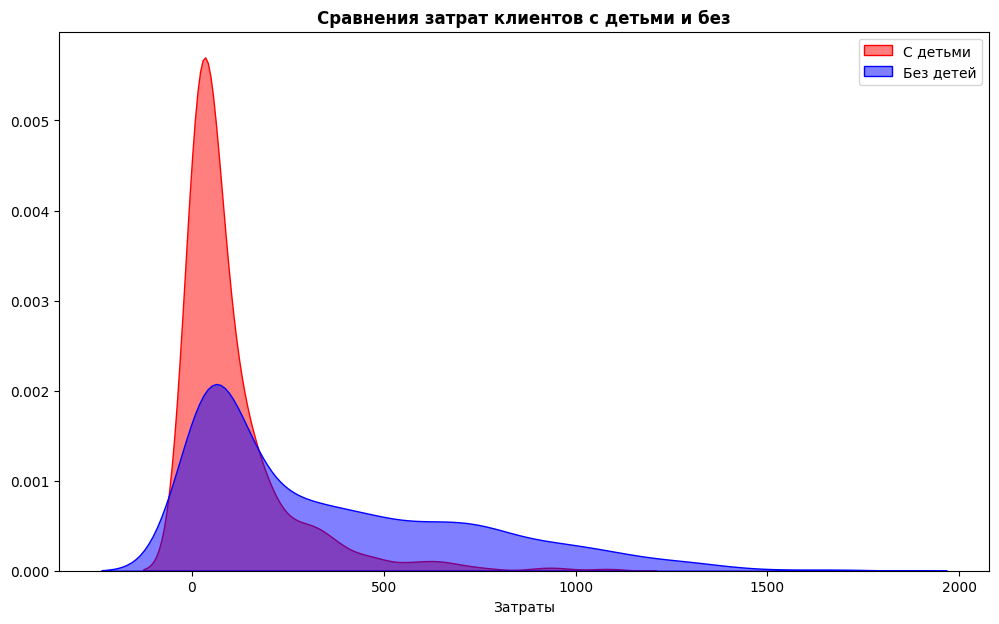

In [137]:
plt.figure(figsize=(12, 7))
plt.title('Сравнения затрат клиентов с детьми и без', weight='bold')
sns.kdeplot(df_number_of_purchases_child, color='red', alpha=.5, fill=True, label='С детьми')
sns.kdeplot(df_number_of_purchases_without_child, color='blue', alpha=.5, fill=True, label='Без детей')
plt.xlabel('Затраты')
plt.ylabel('')
plt.legend()
plt.show()

In [144]:
display(df_number_of_purchases_child.count())
display(df_number_of_purchases_child.mean())

np.int64(474)

np.float64(104.22995780590718)

In [145]:
display(df_number_of_purchases_without_child.count())
display(df_number_of_purchases_without_child.mean())

np.int64(1762)

np.float64(355.0238365493757)

**Вывод:**
- Клиенты с детьми в среднем тратят меньше, чем без детей, но чаще, соответственно, наличие детей и иждивенцев *влияет* на то, сколько тратят денег клиенты 

In [146]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [147]:
df['total_amount_spent'] = (
    df['MntFishProducts'] + 
    df['MntMeatProducts'] + 
    df['MntSweetProducts'] + 
    df['MntGoldProds'] +
    df['MntFruits']
)

In [149]:
df.groupby(by=df['Education'])['total_amount_spent'].mean()

Education
2n Cycle      300.995025
Basic          74.555556
Graduation    335.880995
Master        278.705405
PhD           266.202062
Name: total_amount_spent, dtype: float64

**Вывод**
- Да, наличие образования влияют на затраты

In [151]:
# Женатики больше или меньше тратятся на золото ???

In [153]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [168]:
df_married = df.loc[df['Marital_Status'].isin(['Together', 'Married'])]
df_not_married = df.loc[df['Marital_Status'].isin(['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'])]

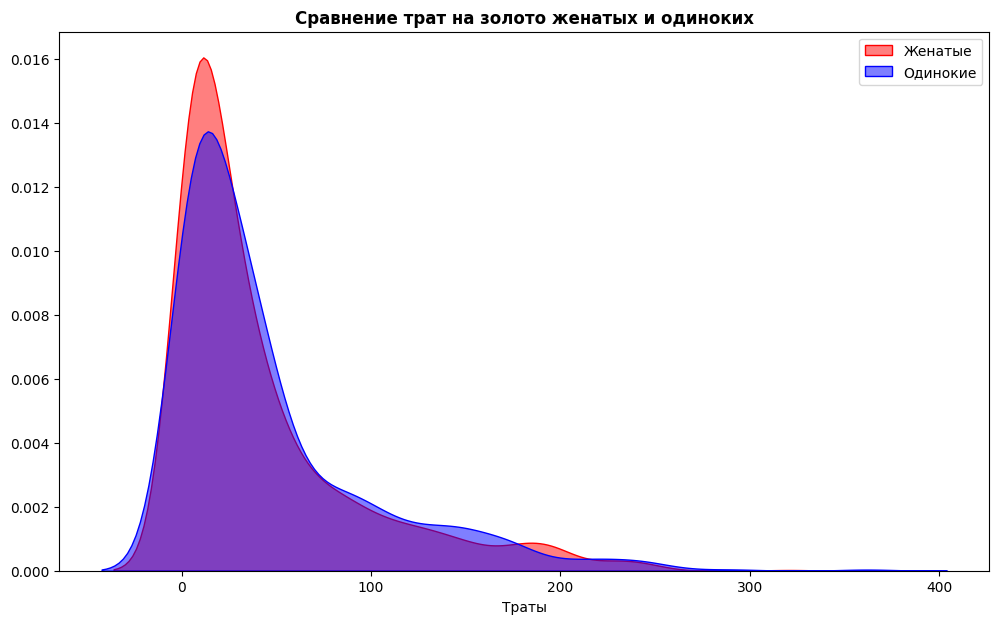

In [169]:
plt.figure(figsize=(12, 7))
plt.title('Сравнение трат на золото женатых и одиноких', weight='bold')
sns.kdeplot(df_married['MntGoldProds'], color='red', alpha=.5, fill=True, label='Женатые')
sns.kdeplot(df_not_married['MntGoldProds'], color='blue', alpha=.5, fill=True, label='Одинокие')
plt.xlabel('Траты')
plt.ylabel('')
plt.legend()
plt.show()

In [170]:
display(df_married.size)
display(df_not_married.size)

display(df_married['MntGoldProds'].mean())
display(df_not_married['MntGoldProds'].mean())

43260

23820

np.float64(42.787794729542306)

np.float64(46.1536523929471)

In [167]:
alpha = .5 

_, pvalue = stats.ttest_ind(df_married['MntGoldProds'], df_not_married['MntGoldProds'])


if (pvalue < .05):
    if df_married['MntGoldProds'].mean() >  df_not_married['MntGoldProds'].mean():
        print(f'pvalue = {round(pvalue, 2)}. Нулевая гипотеза отвергается. Среднее выборки женатых больше выборки одиноких.')
    else:
        print(f'pvalue = {round(pvalue, 2)}. Нулевая гипотеза отвергается. Среднее выборки одиноких больше выборки женатых.')

else:
    print(f'pvalue = {round(pvalue, 2)}. Нулевая гипотеза принимается')

pvalue = 0.19. Нулевая гипотеза принимается


**Вывод**
- Женатые и одинокие покупают золота +/- одинаково

In [171]:
df['NumWebPurchases']

0       8
1       1
2       8
3       2
4       5
       ..
2231    9
2232    8
2233    2
2234    6
2235    3
Name: NumWebPurchases, Length: 2236, dtype: int64

In [172]:
df['NumWebPurchases'].corr(df['NumDealsPurchases'])

np.float64(0.2339710990156369)

In [174]:
correlation = df[['NumWebPurchases', 'NumDealsPurchases']].phik_matrix().iloc[0, 1]

print(f'Phi-корреляция между column1 и column2: {correlation}')

interval columns not set, guessing: ['NumWebPurchases', 'NumDealsPurchases']
Phi-корреляция между column1 и column2: 0.243774831482407


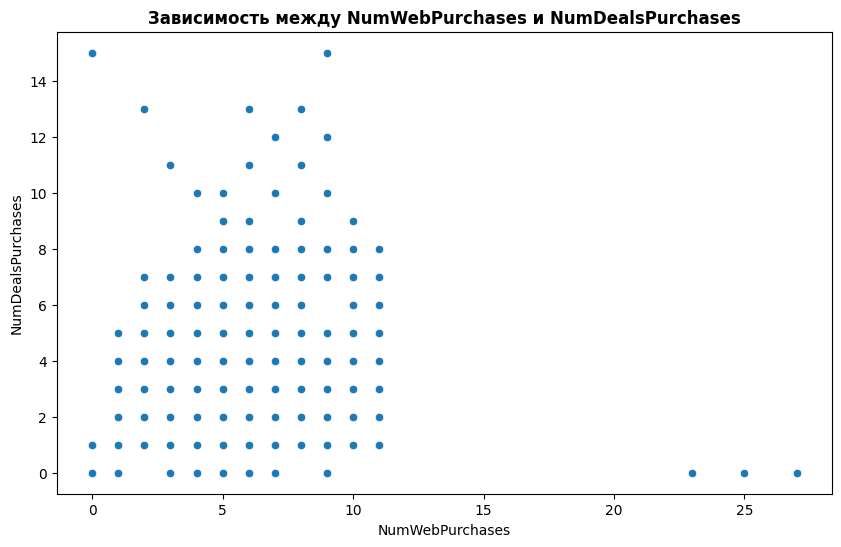

In [175]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['NumWebPurchases'], y=df['NumDealsPurchases'])
plt.title('Зависимость между NumWebPurchases и NumDealsPurchases', weight='bold')
plt.xlabel('NumWebPurchases')
plt.ylabel('NumDealsPurchases')

plt.show()

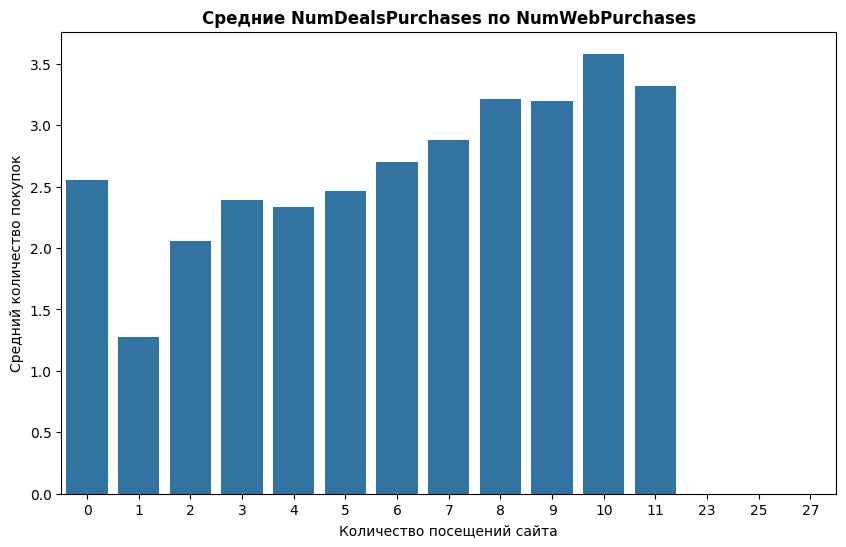

In [184]:
grouped_data = df.groupby('NumWebPurchases')['NumDealsPurchases'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='NumWebPurchases', y='NumDealsPurchases', data=grouped_data)
plt.title('Средние NumDealsPurchases по NumWebPurchases', weight='bold')
plt.xlabel('Количество посещений сайта')
plt.ylabel('Средний количество покупок')

plt.show()

**Вывод** <br>
Есть небольшая корреляция между количеством посещений сайта и количеством покупок со скидкой

In [187]:
df['Complain'].corr(df['total_amount_spent'])

np.float64(-0.024333811427025995)

**Вывод**<br>
Жалобы не влияют на траты

In [188]:
# Люди, принявшие предложение о покупке лишь 
# в последней компании тратят больше, чем люди, 
# принявшие сразу предложение первой компании?

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2236 non-null   int64         
 1   Year_Birth           2236 non-null   int64         
 2   Education            2236 non-null   object        
 3   Marital_Status       2236 non-null   object        
 4   Income               2236 non-null   int64         
 5   Kidhome              2236 non-null   int64         
 6   Teenhome             2236 non-null   int64         
 7   Dt_Customer          2236 non-null   datetime64[ns]
 8   Recency              2236 non-null   int64         
 9   MntWines             2236 non-null   int64         
 10  MntFruits            2236 non-null   int64         
 11  MntMeatProducts      2236 non-null   int64         
 12  MntFishProducts      2236 non-null   int64         
 13  MntSweetProducts     2236 non-nul

In [192]:
df_first_comp = df.loc[df['AcceptedCmp1'] == 1, 'total_amount_spent']
df_last_comp = df.loc[df['Response'] == 1, 'total_amount_spent']
display(df_first_comp.mean())
display(df_last_comp.mean())

np.float64(723.6180555555555)

np.float64(484.688622754491)

**Вывод**
<br><br>
Люди в первой компании тратят больше денег, чем в последней

interval columns not set, guessing: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'total_amount_spent']


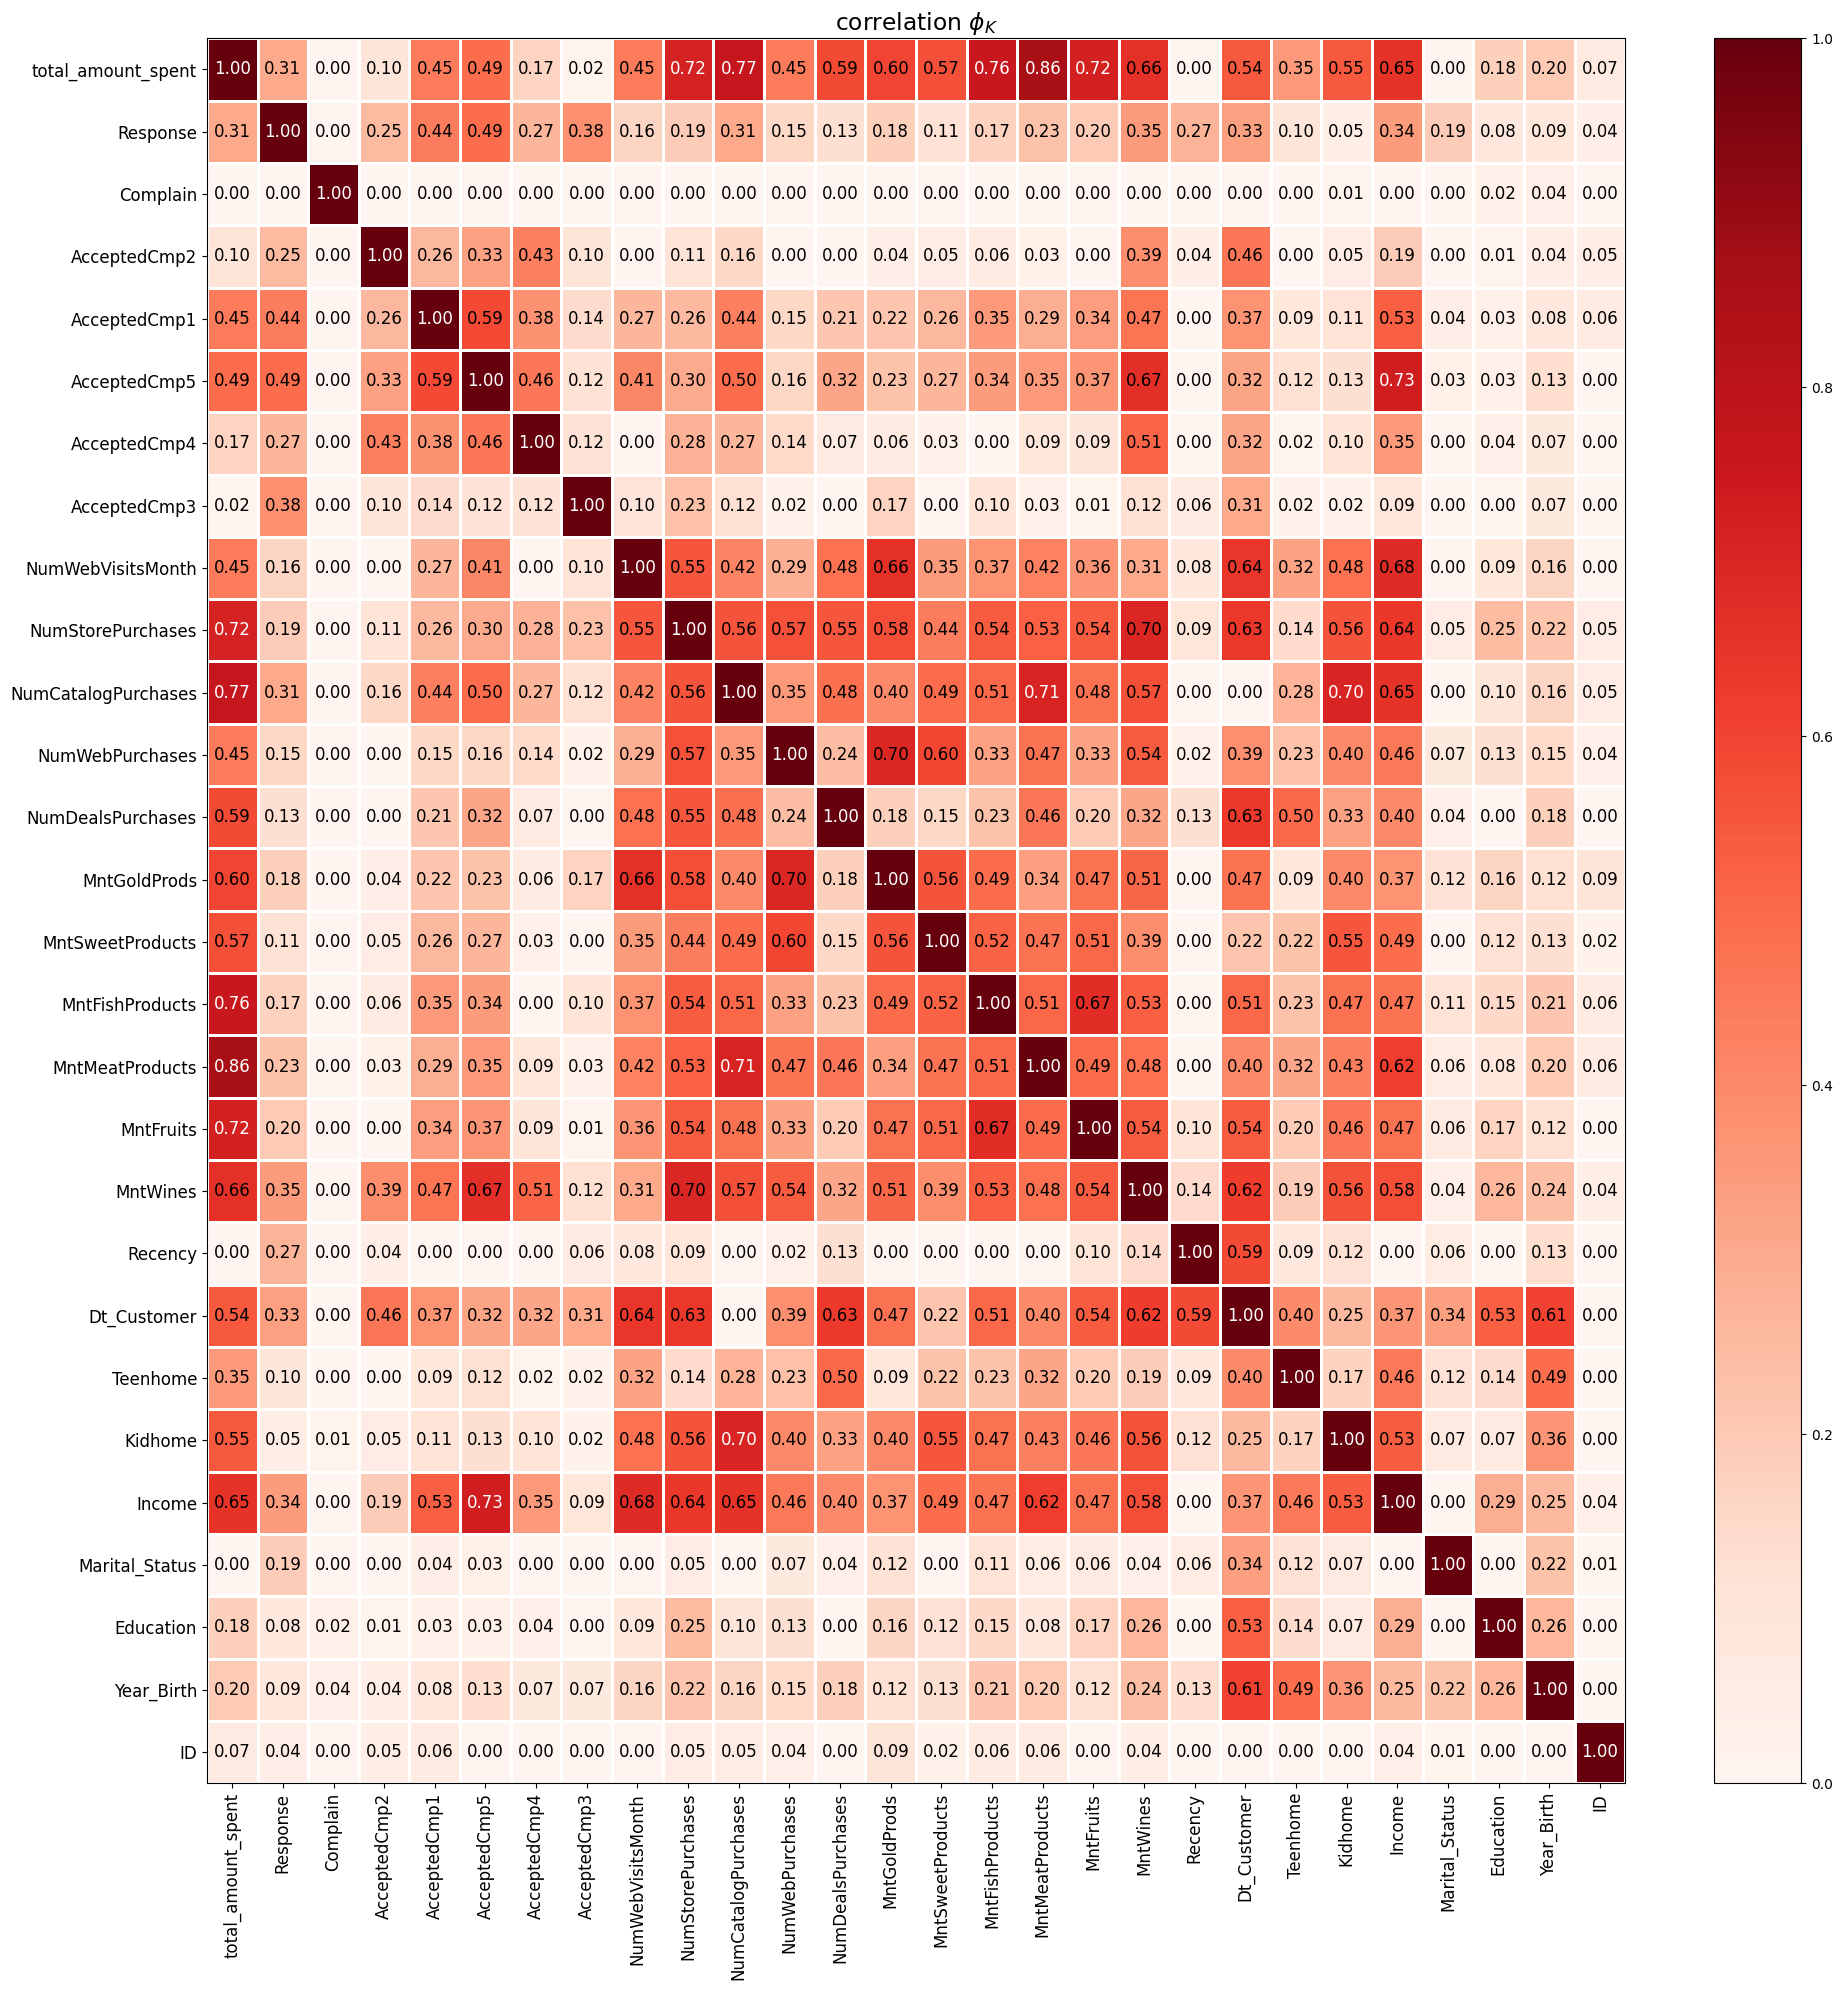

In [219]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Reds", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.2, figsize=(20, 20))
plt.tight_layout()
plt.show()

### ЗАДАНИЕ ПРО

1. Разбейте данные на несколько выборок: по образованию, по уровню заработка и по семейному статусу. Опишите все эти выборки и скажите — отличаются ли они между собой? Опишите общие закономерности для каждого типа — на что чаще тратит женатый человек и жалуется ли он? Люди с PhD покупают фрукты?
2. Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0 — меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?

In [197]:
df[['Education', 'Income', 'Marital_Status']].sample(5)

,Education,Income,Marital_Status
2000,Graduation,33279,Single
1370,PhD,50611,Divorced
2190,2n Cycle,82347,Married
94,PhD,23626,Married
361,Graduation,51479,Married


In [203]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [210]:
df_grad = df.loc[df['Education'] == 'Graduation']
df_phd = df.loc[df['Education'] == 'PhD']
df_master = df.loc[df['Education'] == 'Master']
df_basic = df.loc[df['Education'] == 'Basic']
df_2nCycle = df.loc[df['Education'] == '2n Cycle']

In [220]:
# display(df_grad.describe().T)
# display(df_phd.describe().T)
# display(df_master.describe().T)
# display(df_basic.describe().T)
# display(df_2nCycle.describe().T)

In [ ]:
plt.figure(figsize=(12, 7))
plt.title('Сравнение трат на золото женатых и одиноких', weight='bold')
sns.kdeplot(df_married['MntGoldProds'], color='red', alpha=.5, fill=True, label='Женатые')
sns.kdeplot(df_not_married['MntGoldProds'], color='blue', alpha=.5, fill=True, label='Одинокие')
plt.xlabel('Траты')
plt.ylabel('')
plt.legend()
plt.show()

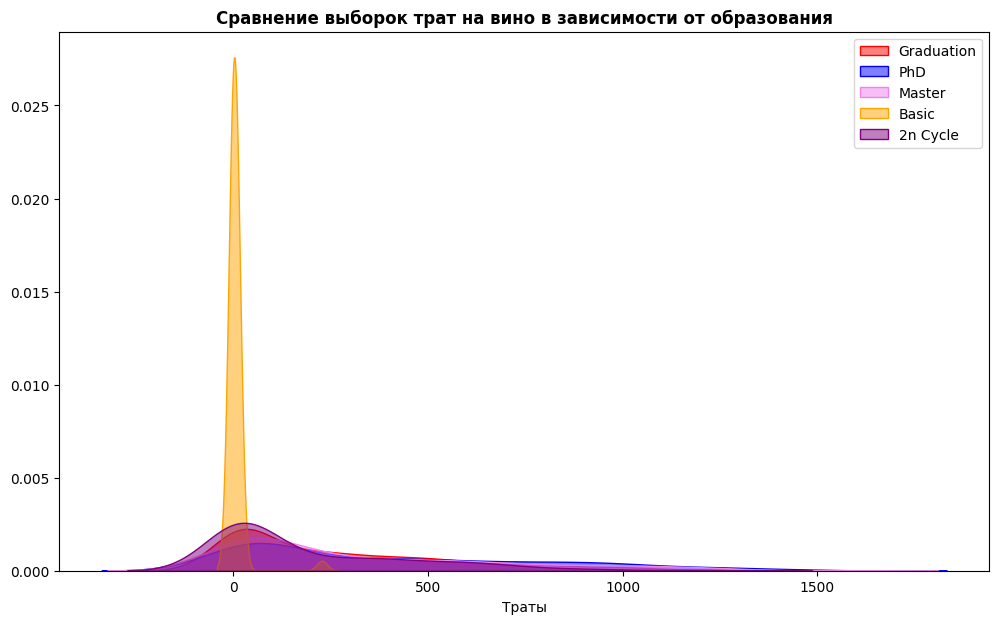

In [222]:
plt.figure(figsize=(12, 7))
plt.title('Сравнение выборок трат на вино в зависимости от образования', weight='bold')
sns.kdeplot(df_grad['MntWines'], color='red', alpha=.5, fill=True, label='Graduation')
sns.kdeplot(df_phd['MntWines'], color='blue', alpha=.5, fill=True, label='PhD')
sns.kdeplot(df_master['MntWines'], color='violet', alpha=.5, fill=True, label='Master')
sns.kdeplot(df_basic['MntWines'], color='orange', alpha=.5, fill=True, label='Basic')
sns.kdeplot(df_2nCycle['MntWines'], color='purple', alpha=.5, fill=True, label='2n Cycle')
plt.xlabel('Траты')
plt.ylabel('')
plt.legend()
plt.show()

In [224]:
display(df_grad['MntWines'].mean())
display(df_phd['MntWines'].mean())
display(df_master['MntWines'].mean())
display(df_basic['MntWines'].mean())
display(df_2nCycle['MntWines'].mean())

np.float64(284.5133214920071)

np.float64(403.77319587628864)

np.float64(333.07567567567565)

np.float64(7.2407407407407405)

np.float64(200.03980099502488)

**Вывод**
<br>
Люди со средним образванием почти не тратят денег на вино

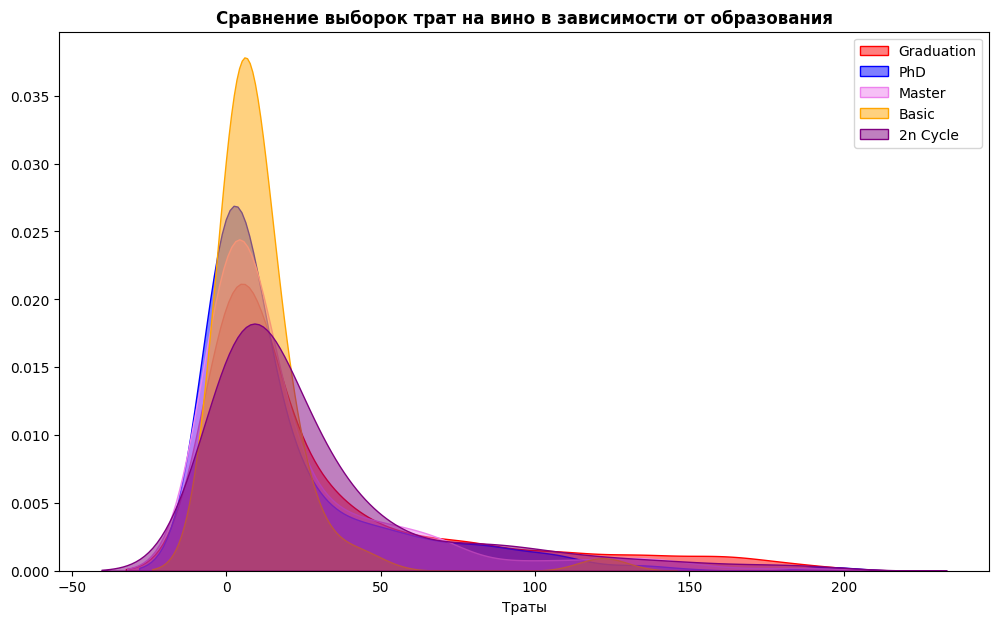

In [225]:
plt.figure(figsize=(12, 7))
plt.title('Сравнение выборок трат на вино в зависимости от образования', weight='bold')
sns.kdeplot(df_grad['MntFruits'], color='red', alpha=.5, fill=True, label='Graduation')
sns.kdeplot(df_phd['MntFruits'], color='blue', alpha=.5, fill=True, label='PhD')
sns.kdeplot(df_master['MntFruits'], color='violet', alpha=.5, fill=True, label='Master')
sns.kdeplot(df_basic['MntFruits'], color='orange', alpha=.5, fill=True, label='Basic')
sns.kdeplot(df_2nCycle['MntFruits'], color='purple', alpha=.5, fill=True, label='2n Cycle')
plt.xlabel('Траты')
plt.ylabel('')
plt.legend()
plt.show()

In [226]:
display(df_grad['MntFruits'].mean())
display(df_phd['MntFruits'].mean())
display(df_master['MntFruits'].mean())
display(df_basic['MntFruits'].mean())
display(df_2nCycle['MntFruits'].mean())

np.float64(30.789520426287744)

np.float64(19.79381443298969)

np.float64(21.654054054054054)

np.float64(11.11111111111111)

np.float64(29.213930348258707)

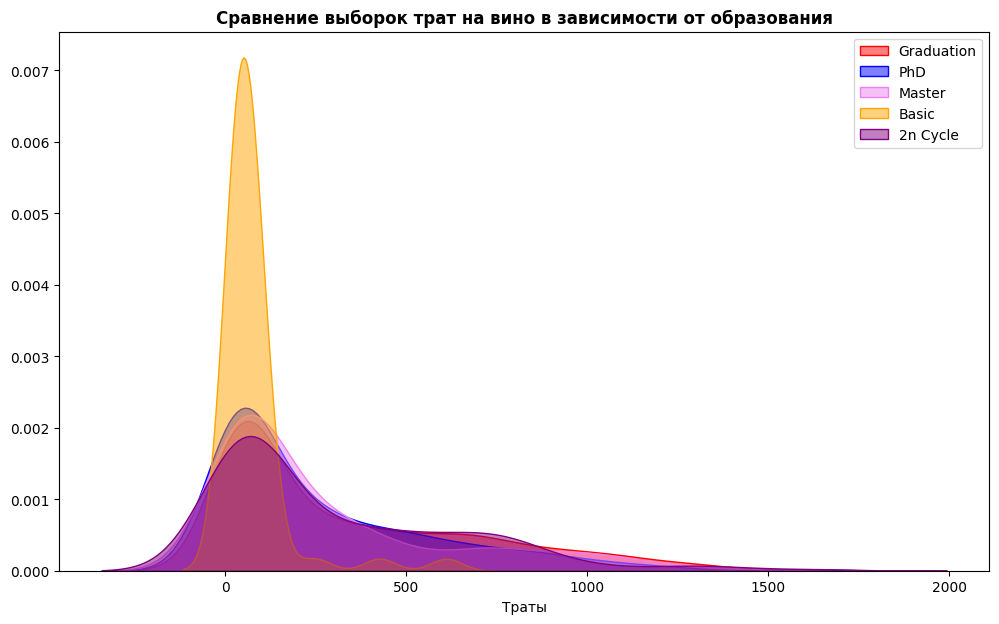

In [227]:
plt.figure(figsize=(12, 7))
plt.title('Сравнение выборок трат на вино в зависимости от образования', weight='bold')
sns.kdeplot(df_grad['total_amount_spent'], color='red', alpha=.5, fill=True, label='Graduation')
sns.kdeplot(df_phd['total_amount_spent'], color='blue', alpha=.5, fill=True, label='PhD')
sns.kdeplot(df_master['total_amount_spent'], color='violet', alpha=.5, fill=True, label='Master')
sns.kdeplot(df_basic['total_amount_spent'], color='orange', alpha=.5, fill=True, label='Basic')
sns.kdeplot(df_2nCycle['total_amount_spent'], color='purple', alpha=.5, fill=True, label='2n Cycle')
plt.xlabel('Траты')
plt.ylabel('')
plt.legend()
plt.show()

In [228]:
display(df_grad['total_amount_spent'].mean())
display(df_phd['total_amount_spent'].mean())
display(df_master['total_amount_spent'].mean())
display(df_basic['total_amount_spent'].mean())
display(df_2nCycle['total_amount_spent'].mean())

np.float64(335.8809946714032)

np.float64(266.2020618556701)

np.float64(278.70540540540543)

np.float64(74.55555555555556)

np.float64(300.9950248756219)

**Вывод**
<br>
Люди с образованием basic в принципе меньше покупают продуктов

In [230]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [237]:
df_married = df.loc[(df['Marital_Status'] == 'Married') | (df['Marital_Status'] == 'Together')]
df_not_married = df.loc[
    (df['Marital_Status'] == 'Single') |
    (df['Marital_Status'] == 'Divorced') | 
    (df['Marital_Status'] == 'Widow') | 
    (df['Marital_Status'] == 'Alone')
]

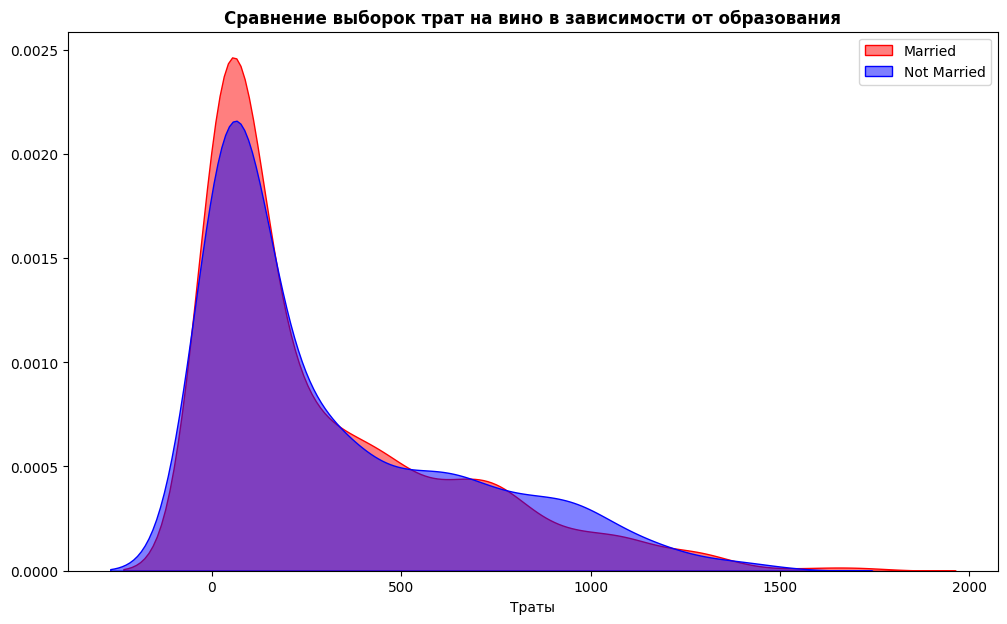

In [238]:
plt.figure(figsize=(12, 7))
plt.title('Сравнение выборок трат на вино в зависимости от образования', weight='bold')
sns.kdeplot(df_married['total_amount_spent'], color='red', alpha=.5, fill=True, label='Married')
sns.kdeplot(df_not_married['total_amount_spent'], color='blue', alpha=.5, fill=True, label='Not Married')
plt.xlabel('Траты')
plt.ylabel('')
plt.legend()
plt.show()

In [239]:
display(df_married['total_amount_spent'].mean())
display(df_not_married['total_amount_spent'].mean())

np.float64(295.04646324549236)

np.float64(313.44556962025314)

In [240]:
display(df_married['Complain'].mean())
display(df_not_married['Complain'].mean())

np.float64(0.009015256588072122)

np.float64(0.008860759493670886)

In [243]:
df_copy = df.copy()
df_copy['Marital_Status'] = pd.factorize(df_copy['Marital_Status'])[0]

0       0
1       0
2       1
3       1
4       2
       ..
2231    2
2232    1
2233    3
2234    1
2235    2
Name: Marital_Status, Length: 2236, dtype: int64

In [245]:
df_copy['Marital_Status'].corr(df_copy['Complain'])

np.float64(-0.026310516777747563)

**Вывод**
<br>
Семейный статус не влияет на жалобы

In [246]:
df_complain = df.loc[df['Complain'] == 1]

In [249]:
df_complain.shape

(20, 30)

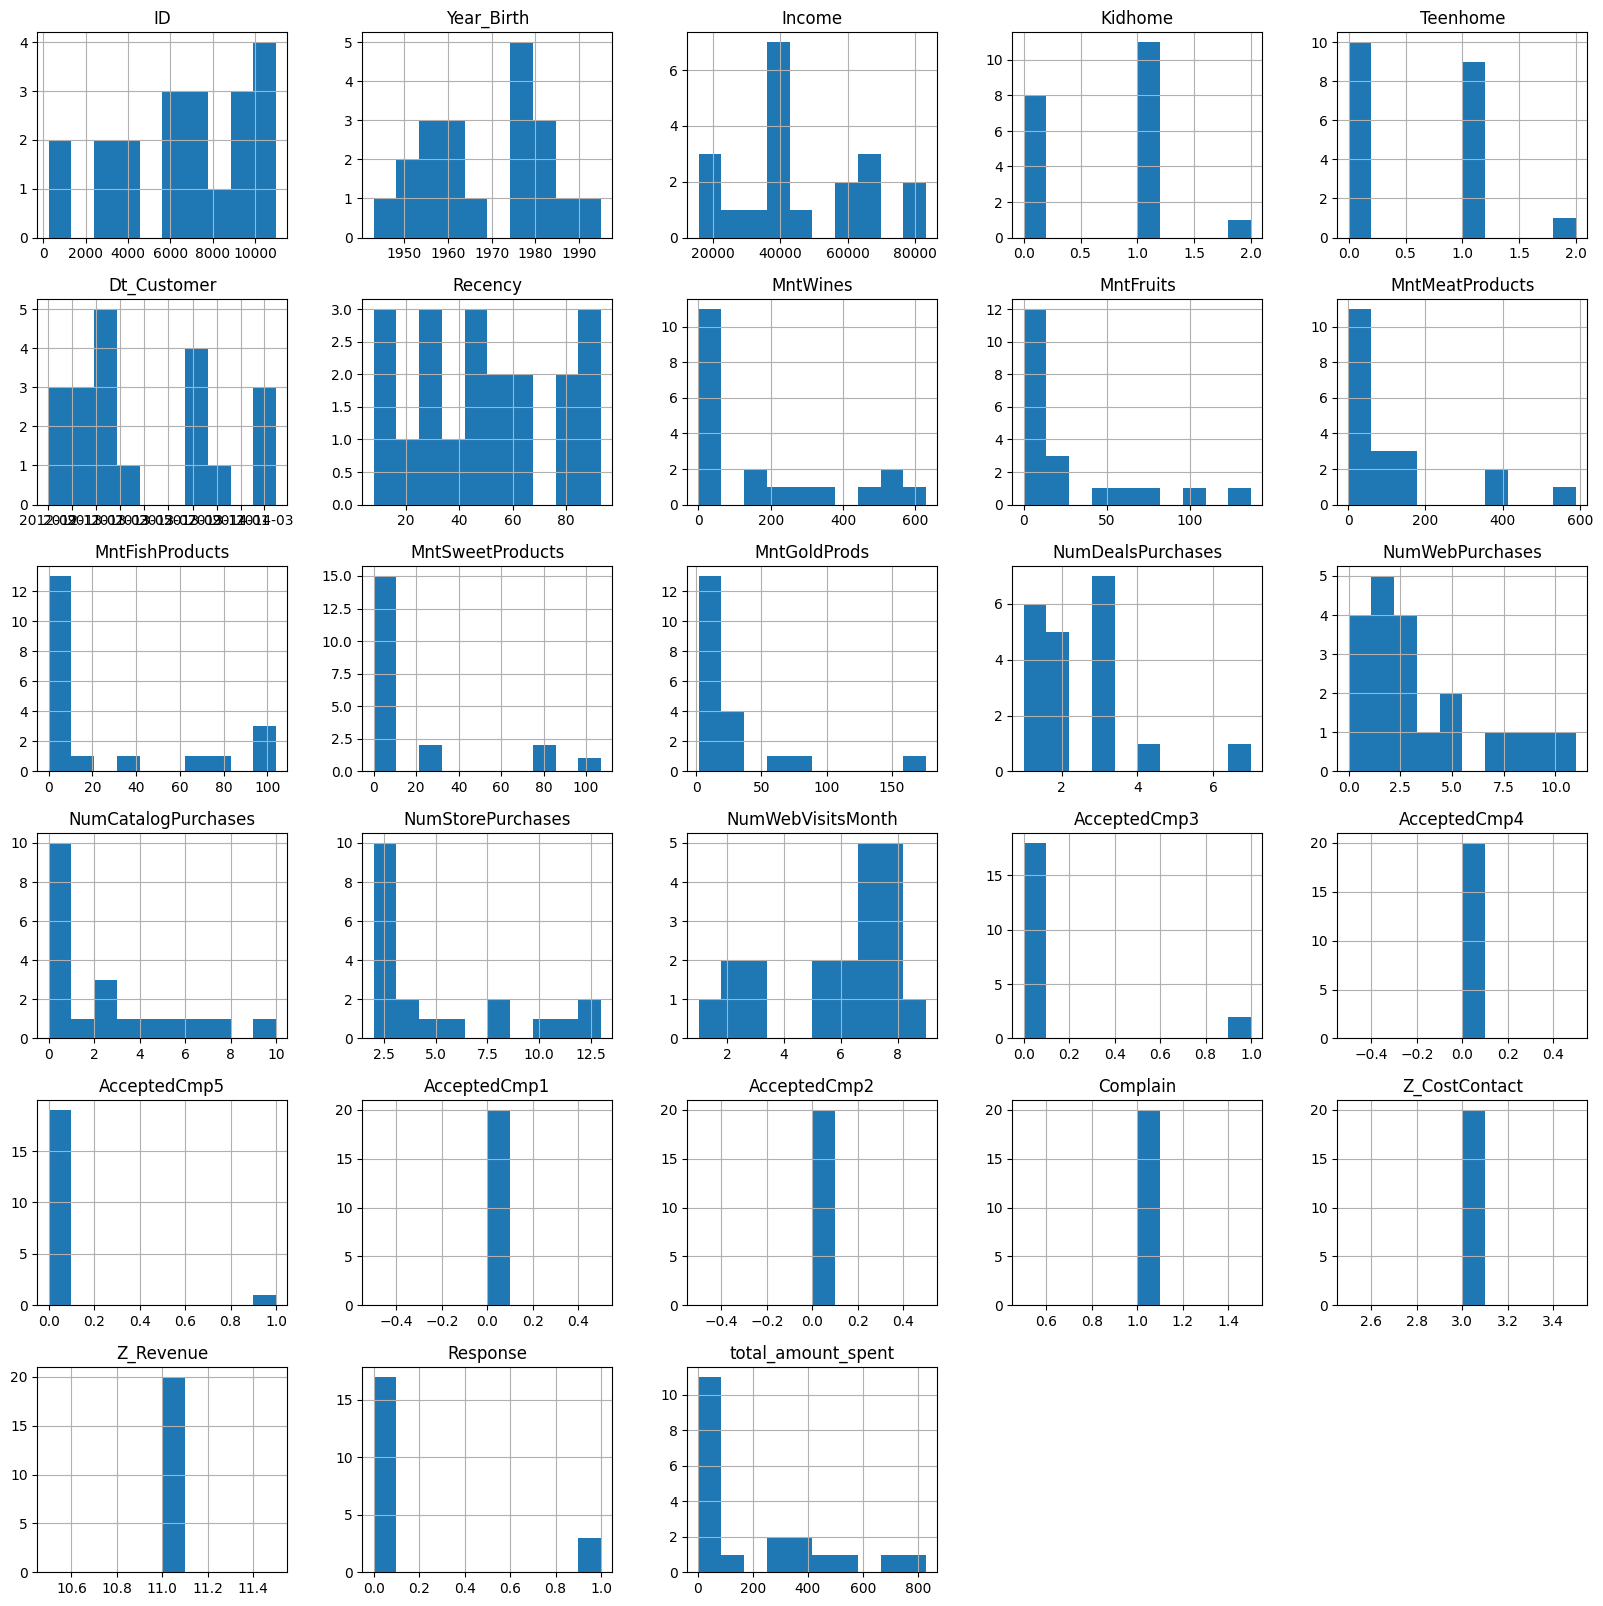

In [248]:
df_complain.hist(figsize=(20, 20))
plt.show()

**Вывод**
Можно сделать небольшой вывод, что жалуются чаще те, кто тратит меньше всего

Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0 — меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?

In [253]:
df_less_median = df.loc[df['total_amount_spent'] < df['total_amount_spent'].median()]
df_less_median.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_amount_spent
1865,8486,1971,Master,Together,30538,1,0,2012-10-01,27,284,...,0,0,0,0,0,0,3,11,0,83
783,1135,1960,Master,Together,17144,1,1,2014-02-15,96,18,...,0,0,0,0,0,0,3,11,0,29
2179,3266,1964,Graduation,Married,42523,0,0,2014-04-23,96,14,...,0,0,0,0,0,0,3,11,0,111
2133,271,1969,Graduation,Widow,40590,1,1,2013-10-02,30,154,...,1,0,0,0,0,0,3,11,0,104
1845,4609,1966,PhD,Married,57705,0,1,2014-01-11,14,383,...,0,0,0,0,0,0,3,11,0,103


In [254]:
df_more_median = df.loc[df['total_amount_spent'] >= df['total_amount_spent'].median()]
df_more_median.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_amount_spent
1786,6173,1979,Graduation,Together,77298,0,1,2013-11-02,46,425,...,0,0,0,0,0,0,3,11,0,544
6,965,1971,Graduation,Divorced,55635,0,1,2012-11-13,34,235,...,0,0,0,0,0,0,3,11,0,355
1258,3979,1983,PhD,Divorced,90687,0,0,2013-05-22,98,982,...,0,0,1,0,0,0,3,11,1,797
88,8504,1973,Graduation,Married,79593,0,0,2014-05-12,70,350,...,0,0,1,0,0,0,3,11,0,1016
53,2225,1977,Graduation,Divorced,82582,0,0,2014-06-07,54,510,...,1,0,0,1,0,0,3,11,1,1107


In [257]:
display(df_more_median['Income'].mean())
display(df_less_median['Income'].mean())


np.float64(66559.0634495085)

np.float64(37338.6078782453)

**Вывод**
<br>
Среднее значение дохода семьи больше у тех, кто тратит больше. На них стоит обратить внимание

# Общий вывод

1. Анализ по семейному положению
У женатых в среднем около 42.79, у неженатых — около 46.15.
Результаты статистического теста показали p-value 0.19, что говорит о том, что значимых различий в тратах на золото между этими группами нет.
Средние общие траты у женатых — около 295.05, у неженатых — 313.45. Это свидетельствует о том, что неженатые тратят немного больше.
2. KDE-графики показали различные паттерны трат на вино в зависимости от уровня образования:
Выпускники вузов: средние траты ~284.51
Доктора наук (PhD): ~403.77 (наибольшие)
Люди с базовым образованием: ~7.24 (наименьшие)
Траты на фрукты:
Выпускники вузов тратят около ~30.79, в то время как люди с базовым образованием — около 11.11. Интересно, что PhD тратят на фрукты меньше всех (~19.79).
Средние траты ~335.88
Доктора наук: ~266.20 (ниже, чем у выпускников)
3. Корреляция между NumWebPurchases и NumDealsPurchases составляет ~0.24, что указывает на умеренную положительную связь.
Корреляция между Complain и total_amount_spent составляет -0.024, что говорит о том, что жалобы практически не влияют на траты.
4. Жалоб среди женатых и неженатых крайне мало: у женатых средний показатель ~0.009, у неженатых — ~0.008, что говорит о незначительных различиях.
Меньшие траты могут коррелировать с большим количеством жалоб: гистограмма показывает, что большинство жалобщиков тратят меньше.
5. Сравнение людей, которые тратят больше и меньше медианного значения, показывает различное поведение, что может быть полезно для разработки маркетинговых стратегий.
Например, люди с более высокими тратами могут быть более заинтересованы в премиум-продуктах, в то время как те, кто тратит меньше, могут нуждаться в акциях или скидках.